In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=(20,5)
# import plotly.express as px

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import pandas as pd
from statsmodels.tsa.stattools import adfuller

In [2]:
# # #slider plot code
# def sliderPlot(df1,i):
#     fig = px.line(df1, y=df1[i] )
#     fig.update_xaxes(
#         rangeslider_visible=True,
#         rangeselector=dict(
#             buttons=list([
#                 dict(count=1, label="1y", step="year", stepmode="backward"),
#                 dict(count=2, label="2y", step="year", stepmode="backward"),
#                 dict(count=3, label="3y", step="year", stepmode="backward"),
#                 dict(step="all")
#             ])
#         ))
#     fig.show()

In [3]:
df=pd.read_csv(r'C:/Users/Harsh/Downloads/DLMS Data/DLMS_Mydata.csv')

In [4]:
# Data Convesion
df['Time']=pd.to_datetime(df['Time'])
df.set_index(['Time'],inplace=True,drop= True)

#checks
# Null value
if df.isna().sum().sum()!=0:
    df.dropna(inplace=True)

filtered_df = df[(df['L1VAvg'] == 0) | (df['L2VAvg'] == 0) | (df['L3VAvg'] == 0) | (df['L1CAvg'] == 0) | (df['L2CAvg'] == 0) | (df['L3CAvg'] == 0)]

filtered_df.loc[:, :] = 0
df.loc[filtered_df.index, :] = filtered_df


dfresample=df[['kwh']].resample(rule='1H').sum()
# print(dfresample.isna().sum())


In [24]:
# result = adfuller(time_series_data)
result=adfuller(dfresample['kwh'],autolag='AIC')
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -3.0924728166751714
p-value: 0.027115271913655325
Critical Values: {'1%': -3.4311360271821867, '5%': -2.8618873695445903, '10%': -2.5669548999686436}


In [25]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

In [ ]:
X = dfresample['kwh']
y = dfresample['kwh']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define the XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # Use 'reg:linear' for regression, 'binary:logistic' for binary classification, etc.
    'max_depth': 3,                  # Maximum depth of the tree
    'learning_rate': 0.1,            # Learning rate (step size shrinkage)
    'n_estimators': 100,              # Number of boosting rounds (trees)
}

# Create the XGBoost classifier or regressor
model = xgb.XGBClassifier(**params)  # Use XGBRegressor for regression

# Train the model
model.fit(X_train, y_train)


In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import pandas as pd
from statsmodels.tsa.stattools import adfuller

,seasonal,trend,resid,kwh
Time,,,,
2022-11-18 00:00:00,199.512897,NaN,NaN,261.3
2022-11-18 01:00:00,67.023969,NaN,NaN,509.1
2022-11-18 02:00:00,-36.321355,NaN,NaN,481.5
2022-11-18 03:00:00,-107.581753,NaN,NaN,472.2
2022-11-18 04:00:00,-168.934107,NaN,NaN,480.8
...,...,...,...,...
2023-10-31 22:00:00,264.657638,NaN,NaN,1066.9
2023-10-31 23:00:00,293.501184,NaN,NaN,975.5
2023-11-01 00:00:00,199.512897,NaN,NaN,887.0


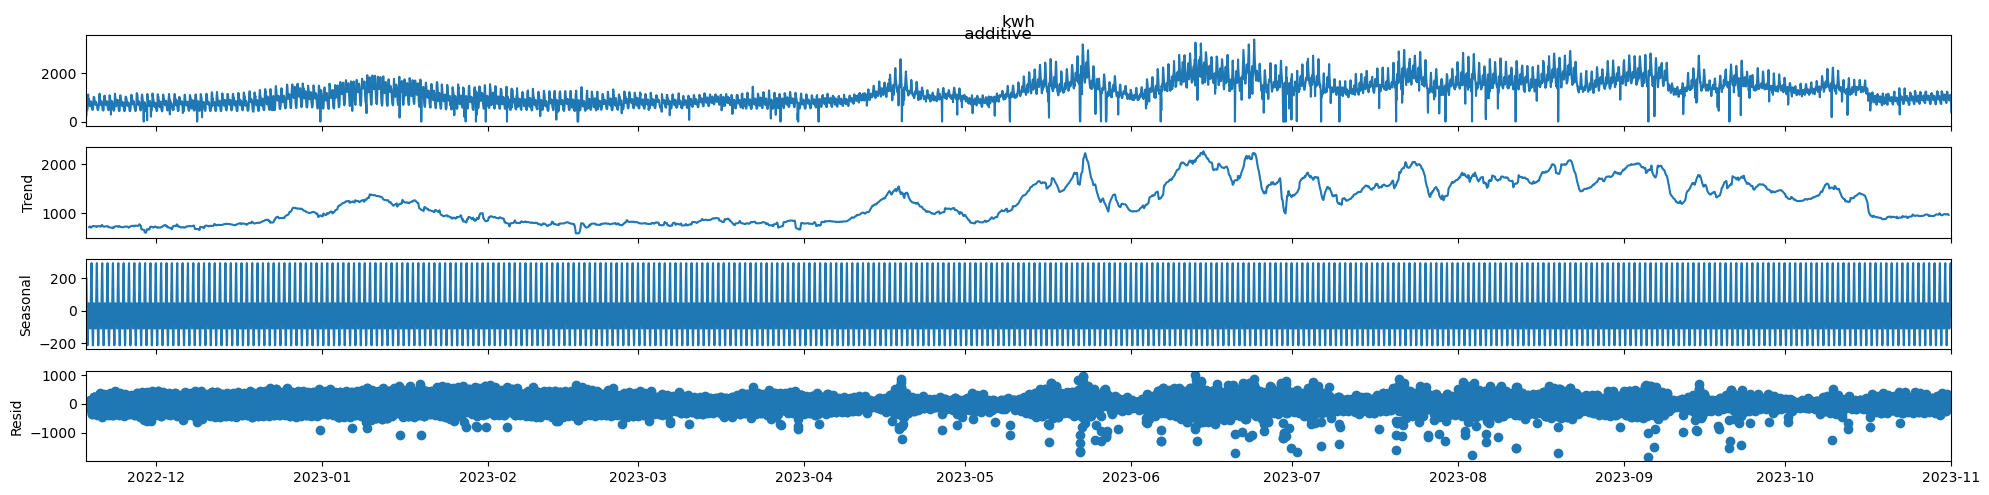

In [6]:
add_resut=seasonal_decompose(dfresample['kwh'],model='additive',period=24)
add_resut.plot().suptitle('\n additive',fontsize=12)
df_s=pd.concat([add_resut.seasonal,add_resut.trend,add_resut.resid,add_resut.observed],axis=1)
df_s.columns=["seasonal",'trend','resid','kwh']
df_s

In [12]:
df_s.interpolate(method='bfill', inplace=True)

In [19]:
df_s

,seasonal,trend,resid,kwh
Time,,,,
2022-11-18 00:00:00,199.512897,724.591667,69.031768,261.3
2022-11-18 01:00:00,67.023969,724.591667,69.031768,509.1
2022-11-18 02:00:00,-36.321355,724.591667,69.031768,481.5
2022-11-18 03:00:00,-107.581753,724.591667,69.031768,472.2
2022-11-18 04:00:00,-168.934107,724.591667,69.031768,480.8
...,...,...,...,...
2023-10-31 22:00:00,264.657638,971.525000,-27.196111,1066.9
2023-10-31 23:00:00,293.501184,971.525000,-27.196111,975.5
2023-11-01 00:00:00,199.512897,971.525000,-27.196111,887.0


<Axes: xlabel='Time'>

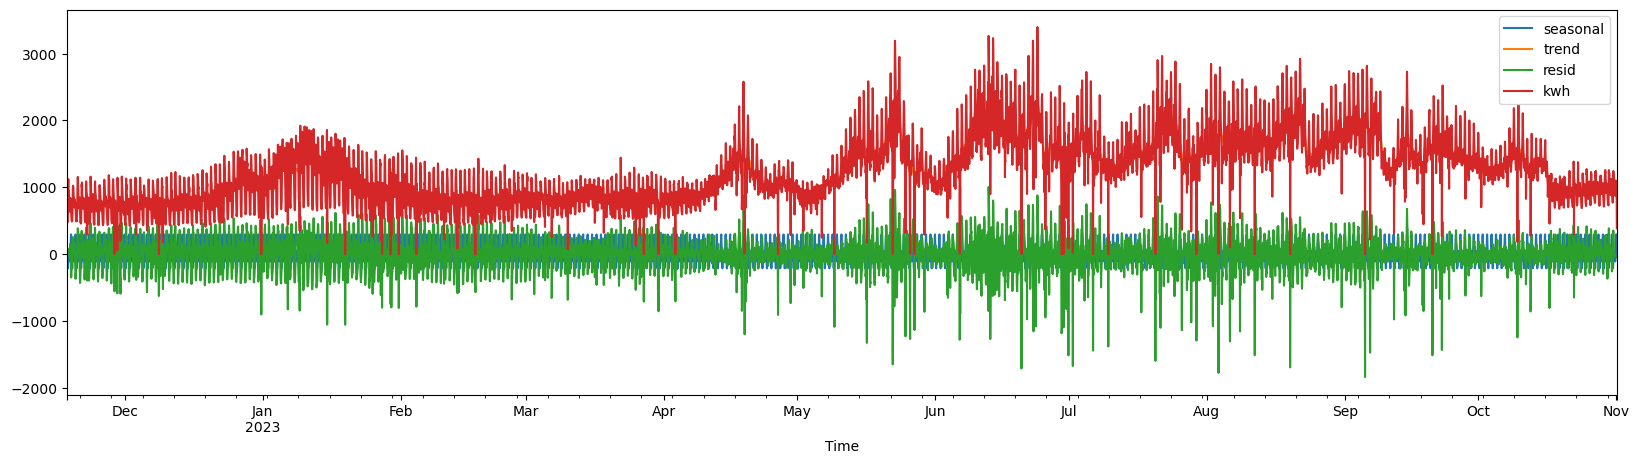

In [20]:
df_s.plot()

In [18]:
df_s.isna().sum()

seasonal    0
trend       0
resid       0
kwh         0
dtype: int64

In [17]:
# result = adfuller(time_series_data)
result=adfuller(df_s['trend'],autolag='AIC')
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -3.092500755849333
p-value: 0.027113166872173116
Critical Values: {'1%': -3.4311364998706444, '5%': -2.861887578412485, '10%': -2.5669550111508928}


<Axes: xlabel='Time'>

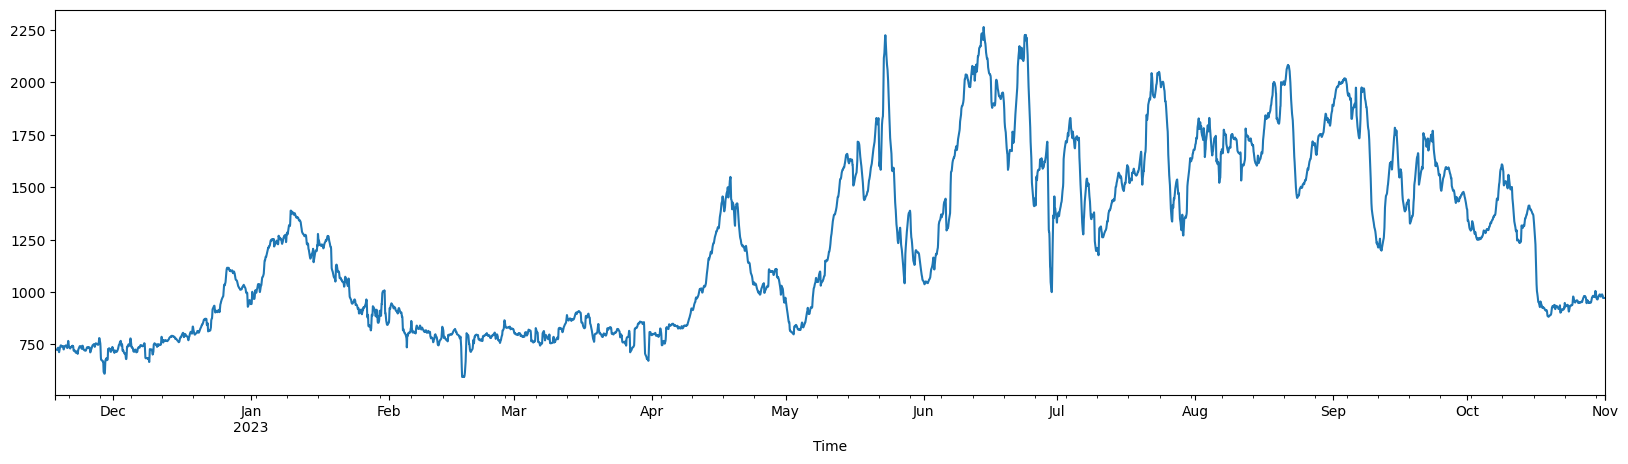

In [21]:
df_s['trend'].plot()